In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
cwd = os.getcwd()
base_path = os.path.abspath(os.path.join(cwd, '../../result/fig4'))


In [2]:
def read_performance_data(leave_label, leave_out):
    path = f"{base_path}/leave_{leave_label}out.csv"
    performance = pd.read_csv(path, index_col=0)
    performance['leave_out'] = leave_out
    performance.rename(columns={
        'cosine_similarity': 'Cosine similarity',
        'mse': 'Mean squared error',
        'mae': 'Mean absolute error',
        'pearson': 'Pearson correlation coefficient'
    }, inplace=True)
    return performance

In [3]:
metrics = ["Cosine similarity", "Pearson correlation coefficient", "Mean squared error", "Mean absolute error"]  

### ECCITE-seq

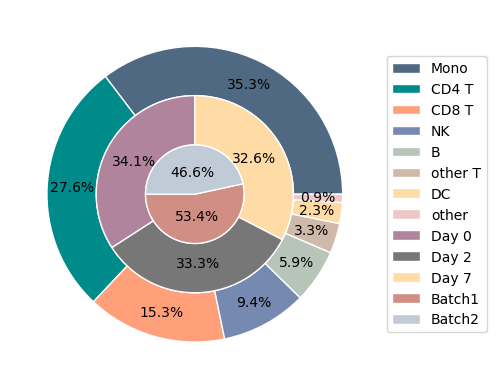

In [4]:
path = base_path+'/meta_ECCITE-seq.csv'
df = pd.read_csv(path, index_col=0)

C1_counts = df['celltype.l1'].value_counts()
C2_counts = df['time'].value_counts()
C2_counts.index = ['Day '+str(i) for i in C2_counts.index]
C3_counts = df['Batch'].value_counts()


colors = [ '#506982', '#008B8B', '#FFA07A', '#7689B1', '#B7C5B8', '#CFB9AB',  '#FFDCA6', '#EFC7C7', 
            '#B0849D','#777777', '#FFDCA6', 
            '#D18E85', '#C1CBD7']

fig, ax = plt.subplots()  
size = 1/3  
wedges1, texts1, autotexts1 = ax.pie(  
    C1_counts, radius=1, labels=None, autopct='%1.1f%%', pctdistance=0.83, colors=colors[:len(C1_counts)],  
    wedgeprops=dict(width=size, edgecolor='w'))  
wedges2, texts2, autotexts2 = ax.pie(  
    C2_counts, radius=1-size, labels=None, autopct='%1.1f%%', pctdistance=0.7, colors=colors[len(C1_counts):len(C1_counts)+len(C2_counts)],  
    wedgeprops=dict(width=size, edgecolor='w'), startangle=90)
wedges3, texts3, autotexts3 = ax.pie(  
    C3_counts, radius=1-2*size, labels=None, autopct='%1.1f%%', pctdistance=0.45, colors=colors[len(C1_counts)+len(C2_counts):],  
    wedgeprops=dict(width=size, edgecolor='w'), startangle=180)
  

ax.set(aspect="equal")
legend_labels = list(C1_counts.index) + list(C2_counts.index) + list(C3_counts.index)
legend_patches = wedges1 + wedges2 + wedges3
ax.legend(legend_patches, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

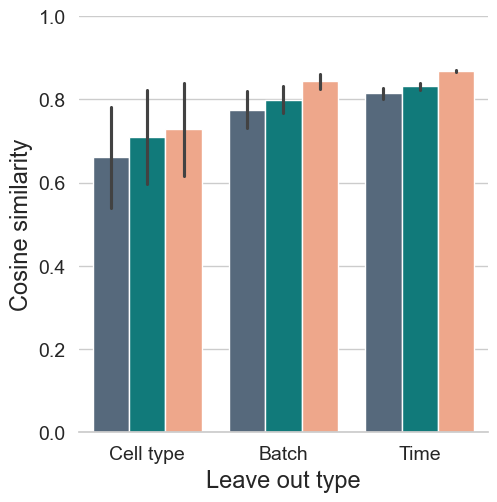

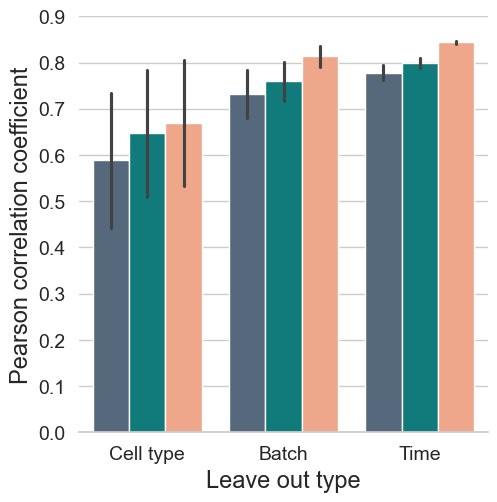

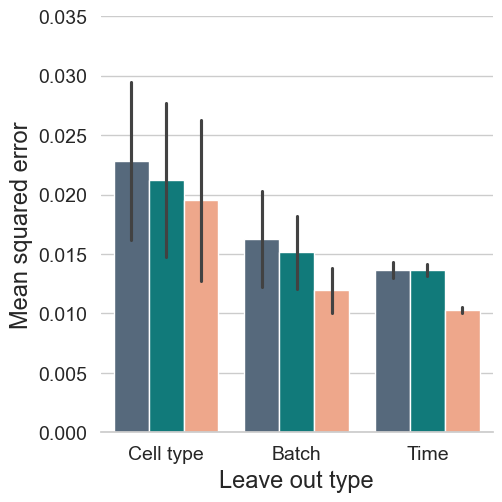

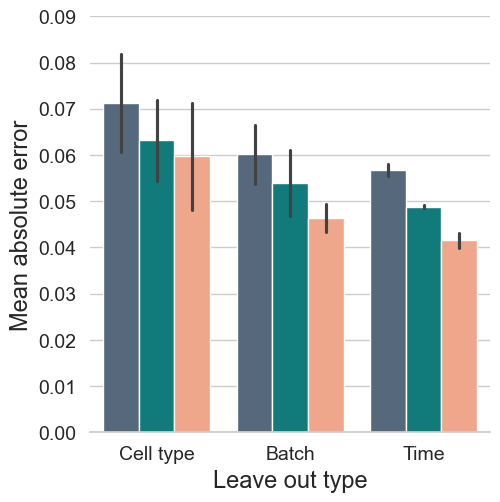

In [5]:
performance_all = read_performance_data('time', 'Time')
performance_all = pd.concat([performance_all, read_performance_data('celltype.l1', 'Cell type')])
performance_all = pd.concat([performance_all, read_performance_data('Batch', 'Batch')])

order = ['Cell type', 'Batch', 'Time']
performance_all['leave_out'] = pd.Categorical(performance_all['leave_out'], categories=order, ordered=True)

sns.set_theme(style="whitegrid")
colors = [ '#506982', '#008B8B', '#FFA07A']
text_size1 = 14
text_size2 = 17

for metric in metrics:
    g = sns.catplot(
        data=performance_all, kind="bar",
        x="leave_out", y=metric, hue="methods",
        errorbar="sd", palette=colors, alpha=1,
        height=5, aspect=1,
        order=order, legend=False
    )
    g.despine(left=True)
    g.set_axis_labels("Leave out type", metric)
    g.set_xticklabels(size=text_size1)
    g.set_yticklabels(size=text_size1)
    g.ax.set_xlabel("Leave out type", fontsize=text_size2)
    g.ax.set_ylabel(metric, fontsize=text_size2)

CITE-seq Mouse

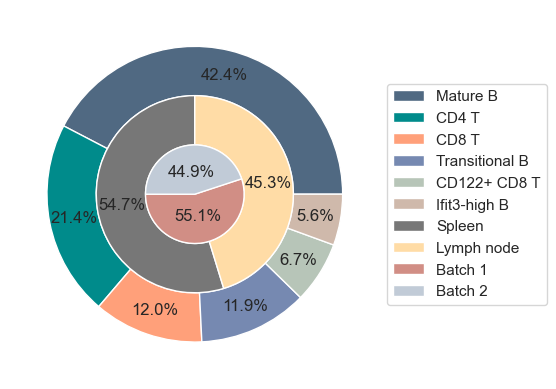

In [6]:
path = base_path+'/meta_CITE-seq_mouse.csv'
df = pd.read_csv(path, index_col=0)
C1_counts = df['Cell type'].value_counts()[:6]
C2_counts = df['Tissue'].value_counts()
C3_counts = df['Batch'].value_counts()
C3_counts.index = ['Batch '+str(int(i)+1) for i in C3_counts.index]

colors = [ '#506982', '#008B8B', '#FFA07A', '#7689B1', '#B7C5B8', '#CFB9AB', 
            '#777777', '#FFDCA6',
            '#D18E85', '#C1CBD7']
fig, ax = plt.subplots() 
size = 1/3
wedges1, texts1, autotexts1 = ax.pie(  
    C1_counts, radius=1, labels=None, autopct='%1.1f%%', pctdistance=0.83, colors=colors[:len(C1_counts)],  
    wedgeprops=dict(width=size, edgecolor='w'))  
wedges2, texts2, autotexts2 = ax.pie(  
    C2_counts, radius=1-size, labels=None, autopct='%1.1f%%', pctdistance=0.75, colors=colors[len(C1_counts):len(C1_counts)+len(C2_counts)],  
    wedgeprops=dict(width=size, edgecolor='w'), startangle=90) 
wedges3, texts3, autotexts3 = ax.pie(  
    C3_counts, radius=1-2*size, labels=None, autopct='%1.1f%%', pctdistance=0.45, colors=colors[len(C1_counts)+len(C2_counts):],  
    wedgeprops=dict(width=size, edgecolor='w'), startangle=180)
  
ax.set(aspect="equal")  
legend_labels = list(C1_counts.index) + list(C2_counts.index) + list(C3_counts.index)
legend_patches = wedges1 + wedges2 + wedges3
ax.legend(legend_patches, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

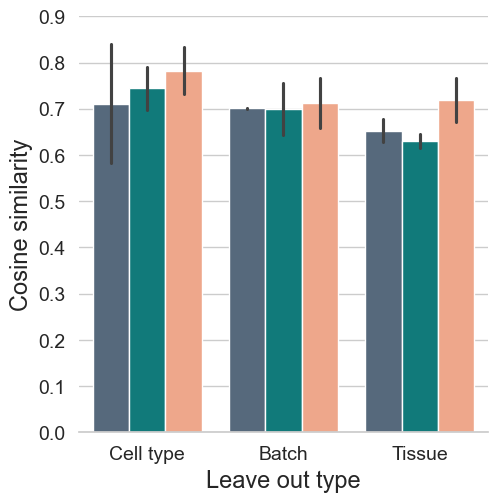

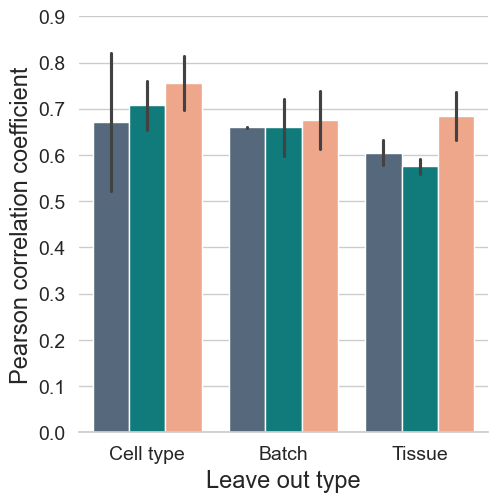

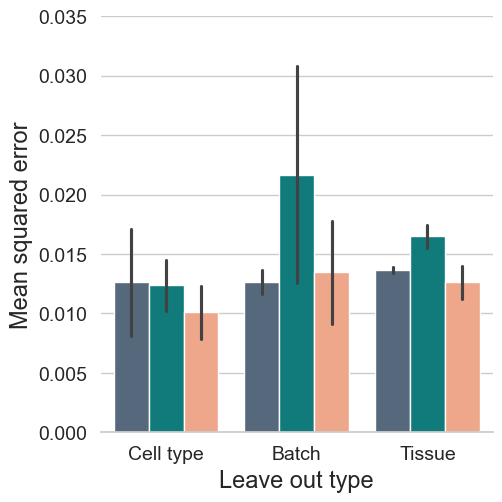

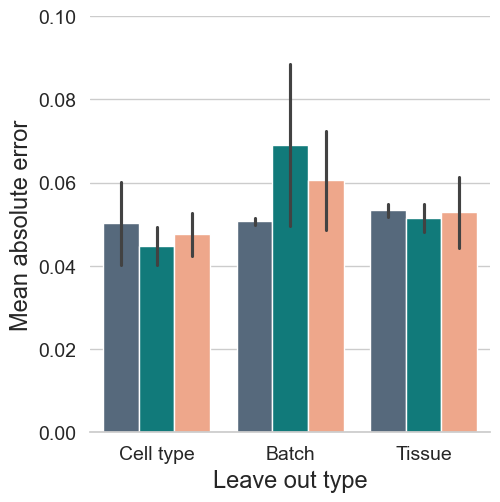

In [7]:
performance_all = read_performance_data('seurat_hash_id', 'Tissue')
performance_all = pd.concat([performance_all, read_performance_data('cell_types', 'Cell type')])
performance_all = pd.concat([performance_all, read_performance_data('batch_indices', 'Batch')])
order = ['Cell type', 'Batch', 'Tissue']
performance_all['leave_out'] = pd.Categorical(performance_all['leave_out'], categories=order, ordered=True)

sns.set_theme(style="whitegrid")
colors = [ '#506982', '#008B8B', '#FFA07A']
text_size1 = 14
text_size2 = 17

for metric in metrics:
    g = sns.catplot(
        data=performance_all, kind="bar",
        x="leave_out", y=metric, hue="methods",
        errorbar="sd", palette=colors, alpha=1,
        height=5, aspect=1,
        order=order, legend=False
    )
    g.despine(left=True)
    g.set_axis_labels("Leave out type", metric)
    g.set_xticklabels(size=text_size1)
    g.set_yticklabels(size=text_size1)
    g.ax.set_xlabel("Leave out type", fontsize=text_size2)
    g.ax.set_ylabel(metric, fontsize=text_size2)

Spatial CITE-seq

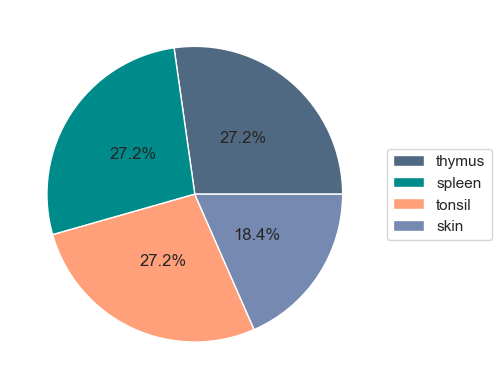

In [8]:
path = base_path+'/meta_spatial_CITE-seq.csv'
df = pd.read_csv(path, index_col=0)
C1_counts = df['Tissue'].value_counts()

colors = [ '#506982', '#008B8B', '#FFA07A', '#7689B1']

fig, ax = plt.subplots() 
size = 1/1  

wedges1, texts1, autotexts1 = ax.pie(  
    C1_counts, radius=1, labels=None, autopct='%1.1f%%', pctdistance=0.5, colors=colors[:len(C1_counts)],  
    wedgeprops=dict(width=size, edgecolor='w'))  
  
ax.set(aspect="equal")
legend_labels = list(C1_counts.index)
legend_patches = wedges1
ax.legend(legend_patches, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [9]:
def read_spatial_performance_data(leave_label, leave_out, metric):
    path = f"{base_path}/leave_{leave_label}out.csv"
    performance = pd.read_csv(path, index_col=0)
    performance['leave_out'] = leave_out
    performance.rename(columns={
        'cosine_similarity': 'Cosine similarity',
        'mse': 'Mean squared error',
        'mae': 'Mean absolute error',
        'pearson': 'Pearson correlation'
    }, inplace=True)
    if metric == 'metric1':
        performance_melted = performance.melt(
            id_vars=['leave_out', 'labelout', 'methods'],
            value_vars=['Cosine similarity', 'Pearson correlation'],
            var_name='metric',
            value_name='value'
        )
    elif metric == 'metric2':
        performance_melted = performance.melt(
            id_vars=['leave_out', 'labelout', 'methods'],
            value_vars=['Mean squared error', 'Mean absolute error'],
            var_name='metric',
            value_name='value'
        )
    return performance_melted

Text(-103.30555555555556, 0.5, '')

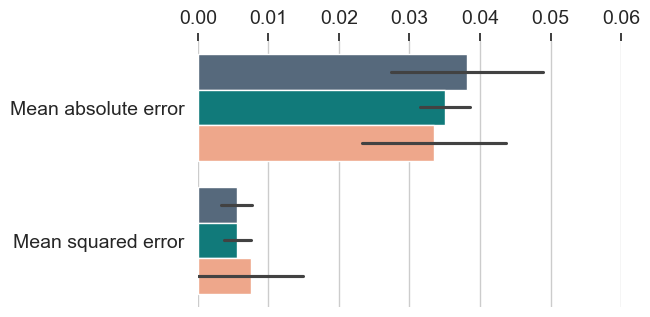

In [10]:
metric = 'metric2'
performance_all = read_spatial_performance_data('tissue', 'Tissue', metric)
if metric == 'metric1':
    order = ['Cosine similarity', 'Pearson correlation']
elif metric == 'metric2':
    order = ['Mean absolute error', 'Mean squared error']

performance_all['metric'] = pd.Categorical(performance_all['metric'], categories=order, ordered=True)

sns.set_theme(style="whitegrid")
colors = ['#506982', '#008B8B', '#FFA07A']
text_size1 = 14
text_size2 = 17

g = sns.catplot(
    data=performance_all, kind="bar",
    y='metric', x='value', hue="methods",
    errorbar="sd", palette=colors, alpha=1,
    height=3.5, aspect=1.8,
    order=order, legend=False
)
g.despine(left=True, bottom=True)

g.set_xticklabels(size=text_size1)
g.ax.xaxis.set_label_position('top')
g.ax.xaxis.tick_top()
g.ax.set_xlabel('', fontsize=text_size2)
g.ax.xaxis.set_label_coords(0.5, 1.1)
g.ax.tick_params(axis='x', bottom=False)
g.set_yticklabels(size=text_size1, rotation=0)
g.ax.set_ylabel("", fontsize=text_size2)

# Neat-seq

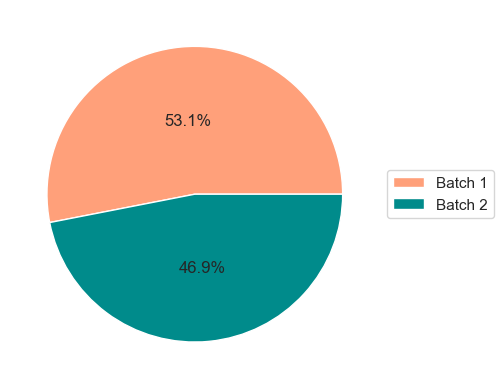

In [11]:
path = base_path + '/meta_NEAT-seq.csv'
df = pd.read_csv(path, index_col=0)
C1_counts = df['Batch'].value_counts()
C1_counts.index = ['Batch '+str(i) for i in C1_counts.index]
colors = ['#FFA07A', '#008B8B']
  
fig, ax = plt.subplots()  
size = 1/1
wedges1, texts1, autotexts1 = ax.pie(  
    C1_counts, radius=1, labels=None, autopct='%1.1f%%', pctdistance=0.5, colors=colors[:len(C1_counts)],  
    wedgeprops=dict(width=size, edgecolor='w'))  
  
ax.set(aspect="equal")    
legend_labels = list(C1_counts.index)
legend_patches = wedges1
ax.legend(legend_patches, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [12]:
def read_neat_performance_data(leave_label, leave_out, metric):
    path = f"{base_path}/leave_{leave_label}out.csv"
    performance = pd.read_csv(path, index_col=0)
    performance['leave_out'] = leave_out
    performance.rename(columns={
        'cosine_similarity': 'Cosine similarity',
        'mse': 'Mean squared error',
        'mae': 'Mean absolute error',
        'pearson': 'Pearson correlation'
    }, inplace=True)
    
    if metric == 'metric1':
        performance_melted = performance.melt(
            id_vars=['leave_out', 'labelout', 'methods'],
            value_vars=['Cosine similarity', 'Pearson correlation'],
            var_name='metric',
            value_name='value'
        )
    elif metric == 'metric2':
        performance_melted = performance.melt(
            id_vars=['leave_out', 'labelout', 'methods'],
            value_vars=['Mean squared error', 'Mean absolute error'],
            var_name='metric',
            value_name='value'
        )
    return performance_melted

Text(-103.30555555555556, 0.5, '')

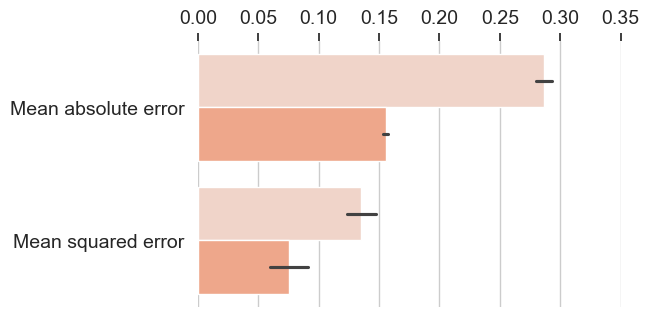

In [13]:
metric = 'metric2'
performance_all = read_neat_performance_data('lane', 'Batch', metric)
if metric == 'metric1':
    order = ['Cosine similarity', 'Pearson correlation']
elif metric == 'metric2':
    order = ['Mean absolute error', 'Mean squared error']
    
performance_all['metric'] = pd.Categorical(performance_all['metric'], categories=order, ordered=True)

sns.set_theme(style="whitegrid")
colors = ['#F6D1C2','#FFA07A']
text_size1 = 14
text_size2 = 17
g = sns.catplot(
    data=performance_all, kind="bar",
    y='metric', x='value', hue="methods",
    errorbar="sd", palette=colors, alpha=1,
    height=3.5, aspect=1.8,
    order=order, hue_order=['scTranslator-scratch','scTranslator'], legend=False
)
g.despine(left=True, bottom=True)
g.set_xticklabels(size=text_size1)
g.ax.xaxis.set_label_position('top')
g.ax.xaxis.tick_top()
g.ax.set_xlabel('', fontsize=text_size2)
g.ax.xaxis.set_label_coords(0.5, 1.1)
g.ax.tick_params(axis='x', bottom=False)
g.set_yticklabels(size=text_size1, rotation=0)
g.ax.set_ylabel("", fontsize=text_size2)